# Documentação networkx

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality



In [27]:
import networkx as nx
import pandas as pd
from pyvis.network import Network
#import sqlalchemy
import ibm_db
import ibm_db_dbi

In [28]:
#conactando ao BigSql
#COLOCAR CREDENCIAIS
db = ibm_db.connect("DATABASE=BIGSQL;HOSTNAME=bigsql.pro.intra.rs.gov.br;PORT=32051;PROTOCOL=TCPIP;UID=XXXXXXX;PWD=XXXXXX;", "", "")
conn = ibm_db_dbi.Connection(db)   
#cur = conn.cursor()

In [29]:
# buscando os dados 
query = "select SRC,TGT,REL,WEIGHT from PROCERGS_MILENA_VILLAR.RELACIONAMENTO;"
df = pd.read_sql_query(query, conn)
g = nx.from_pandas_edgelist(df, 'SRC', 'TGT', edge_attr=True)


In [31]:
# criando o grafo não direcionado
G = nx.Graph(g)
# criando o grafo multi direcionado
#G = nx.MultiDiGraph(g)

In [32]:
#verificando os atributos das arestas
G.edges(1,data=True)

OutMultiEdgeDataView([(1, 2, {'REL': 'marido', 'WEIGHT': 4}), (1, 3, {'REL': 'mãe', 'WEIGHT': 5}), (1, 4, {'REL': 'mãe', 'WEIGHT': 5}), (1, 16, {'REL': 'irmã', 'WEIGHT': 3}), (1, 14, {'REL': 'mãe', 'WEIGHT': 5}), (1, 15, {'REL': 'pai', 'WEIGHT': 5}), (1, 11, {'REL': 'cunhada', 'WEIGHT': 1}), (1, 10, {'REL': 'irmão', 'WEIGHT': 3}), (1, 5, {'REL': 'sogra', 'WEIGHT': 1})])

In [33]:
# plotar o grafo
nt = Network("400px", "900px", notebook = True)
nt.from_nx(G)
nt.show("grafo.html")

In [34]:
#buscando os labels dos nós(vértices)
query = "select * from PROCERGS_MILENA_VILLAR.PESSOAS;"
df_node = pd.read_sql_query(query, conn)

In [35]:
#transformando a tabela em um dicionário para atribuir labels aos IDs dos nós
nodelabel = df_node.set_index("ID").T.to_dict('records')[0]
# atribuindo o atributo label
nx.set_node_attributes(G, nodelabel, 'title')
G.nodes(data=True)

NodeDataView({2: {'size': 10, 'title': 'Eloi'}, 1: {'size': 10, 'title': 'Vivianne'}, 3: {'size': 10, 'title': 'Jade'}, 4: {'size': 10, 'title': 'Camila'}, 10: {'size': 10, 'title': 'Fabio'}, 16: {'size': 10, 'title': 'Virginia'}, 11: {'size': 10, 'title': 'Elis'}, 12: {'size': 10, 'title': 'Felipe'}, 13: {'size': 10, 'title': 'Brenda'}, 15: {'size': 10, 'title': 'Ney'}, 14: {'size': 10, 'title': 'Maria'}, 17: {'size': 10, 'title': 'Joaquim'}, 18: {'size': 10, 'title': 'Marisa'}, 7: {'size': 10, 'title': 'Inês'}, 19: {'size': 10, 'title': 'Maiara'}, 20: {'size': 10, 'title': 'Ligia'}, 8: {'size': 10, 'title': 'Barbara'}, 6: {'size': 10, 'title': 'Ricardo'}, 5: {'size': 10, 'title': 'Eduardo'}, 9: {'size': 10, 'title': 'Carolina'}})

## Algoritmo Closeness
Inverso da distância média de um indivíduo com os demais.
Esta medida de centralidade tenta expressar a importância de um vértice pelo fato dele estar próximo a muitos outros vértices.Quanto mais central for um nó, mais próximo estará de todos os outros nós.
Mede o número de caminhos mais curtos em que o nó se encontra. Essa centralidade costuma ser usada para determinar o fluxo de informações no gráfico. Quanto maior o número, mais informações fluem por ele.
É uma boa medida para determinar o quão isolado um determinado membro está na rede: quanto menor o grau mais isolado.
Implementado para grafos multidirecionais.


In [36]:
for k, v in sorted(nx.closeness_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

4 : 0.7916666666666666
1 : 0.6129032258064516
15 : 0.6129032258064516
14 : 0.6129032258064516
3 : 0.59375
5 : 0.59375
2 : 0.5757575757575758
12 : 0.5757575757575758
13 : 0.5757575757575758
8 : 0.5588235294117647
6 : 0.5588235294117647
9 : 0.5588235294117647
7 : 0.5428571428571428
10 : 0.475
19 : 0.4634146341463415
20 : 0.4634146341463415
16 : 0.4523809523809524
11 : 0.4418604651162791
17 : 0.3958333333333333
18 : 0.3958333333333333


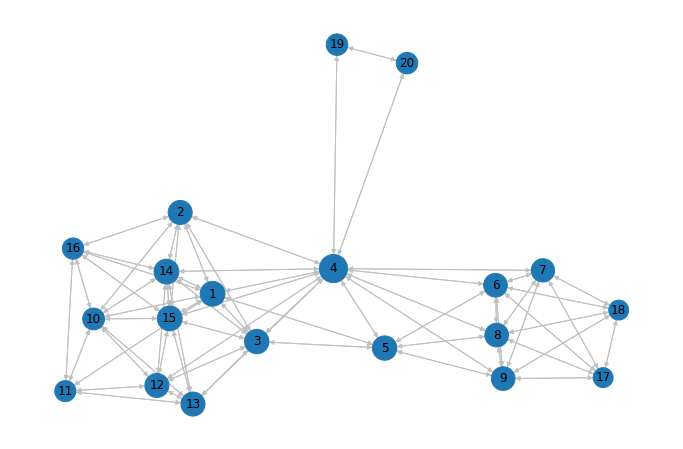

In [37]:
# plotando conforme o grau de proximidade (closeness)
import matplotlib.pyplot as plt
cc = nx.closeness_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in cc.values()], edge_color='silver')